In [43]:
import math
import numpy
from matplotlib import pyplot
# embed the figures into the notebook
%matplotlib inline

In [98]:
u_inf=1
N=145
M=100
c=1
x_circle=-0.15
y_circle=0
circle=x_circle+y_circle*1j
r=numpy.linspace(1,5,M)
a=numpy.linspace(0, 2*numpy.pi, N)
r_circle = math.sqrt(x_circle**2+y_circle**2)
R, arfa= numpy.meshgrid(r,a)

aoa=(20/180)*numpy.pi
z = R*numpy.exp(arfa*1j)
zp=(z-(x_circle+y_circle*1j))*numpy.exp(-aoa*1j)
z = z -0.15
z = z + r_circle*numpy.exp(arfa*1j)


zp = zp+ circle
zp = zp + r_circle*numpy.exp(arfa*1j)
zeta = z+c**2/z
kappa =2*numpy.pi*(numpy.sqrt(x_circle**2+y_circle**2)+1)**2 * u_inf

In [99]:
def get_velocity_doublet(strength, xd, yd, X, Y):
    u = - strength/(2*math.pi)*((X-xd)**2-(Y-yd)**2)/((X-xd)**2+(Y-yd)**2)**2
    v = - strength/(2*math.pi)*2*(X-xd)*(Y-yd)/((X-xd)**2+(Y-yd)**2)**2
    
    return u, v

def get_stream_function_doublet(strength, xd, yd, X, Y):
    psi = - strength/(2*math.pi)*(Y-yd)/((X-xd)**2+(Y-yd)**2)
    
    return psi

In [100]:
u_doublet, v_doublet = get_velocity_doublet(kappa, x_circle, y_circle, zp.real, zp.imag)
psi_doublet = get_stream_function_doublet(kappa, x_circle, y_circle, zp.real, zp.imag)

In [101]:
u_freestream = u_inf * numpy.ones((N, M), dtype=float)
v_freestream = numpy.zeros((N, M), dtype=float)

psi_freestream = u_inf * zp.imag

In [102]:
u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet

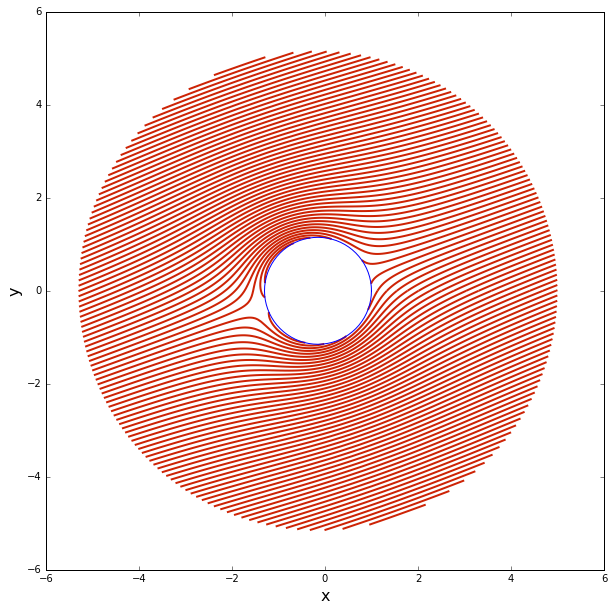

In [103]:
size = 10 
pyplot.figure(figsize=(size,size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(-6, 6)
pyplot.ylim(-6, 6)
pyplot.contour(z.real, z.imag, psi, levels=numpy.linspace(-5,5,100), colors='#CD2305', linewidths=2, linestyles='solid')
pyplot.plot((z[:,0]).real,(z[:,0]).imag)

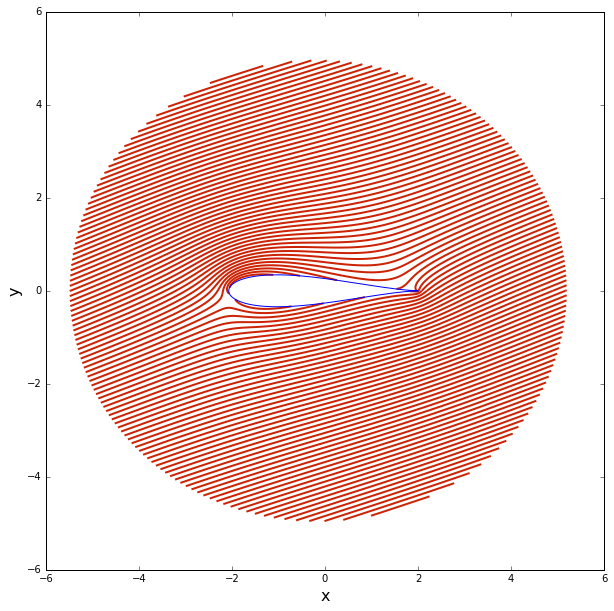

In [104]:
size = 10
pyplot.figure(figsize=(size, size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(-6, 6)
pyplot.ylim(-6, 6)
pyplot.contour(zeta.real, zeta.imag, psi, levels=numpy.linspace(-5,5,100), colors='#CD2305', linewidths=2, linestyles='solid')
pyplot.plot((zeta[:,0]).real,(zeta[:,0]).imag)

In [105]:
W_p = (u-1j*v)*numpy.exp(-aoa*1j)

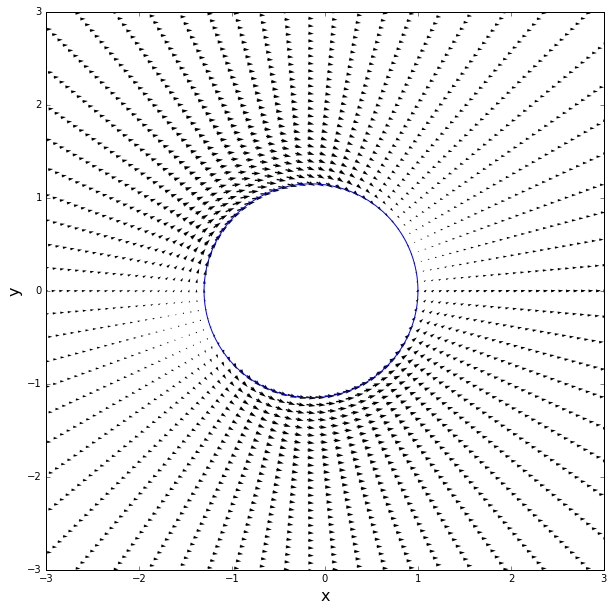

In [106]:
size = 10
pyplot.figure(figsize=(size,size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(-3, 3)
pyplot.ylim(-3, 3)
pyplot.quiver(z.real[::2, ::2], z.imag[::2, ::2], u[::2, ::2], v[::2, ::2],
               pivot='mid', units='xy')
pyplot.plot((z[:,0]).real,(z[:,0]).imag)


/home/gil/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


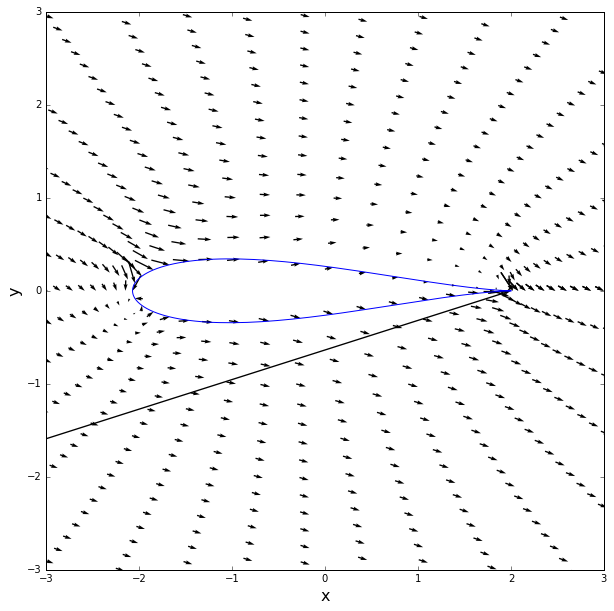

In [107]:
W_r = (W_p.real+1j*W_p.imag)/(1-(c/z)**2)
size = 10
pyplot.figure(figsize=(size,size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(-3, 3)
pyplot.ylim(-3, 3)
pyplot.quiver(zeta.real[::4, ::4], zeta.imag[::4, ::4], W_r.real[::4, ::4], W_r.imag[::4, ::4],
               pivot='tip', units='xy',scale=10)
pyplot.plot((zeta[:,0]).real,(zeta[:,0]).imag)

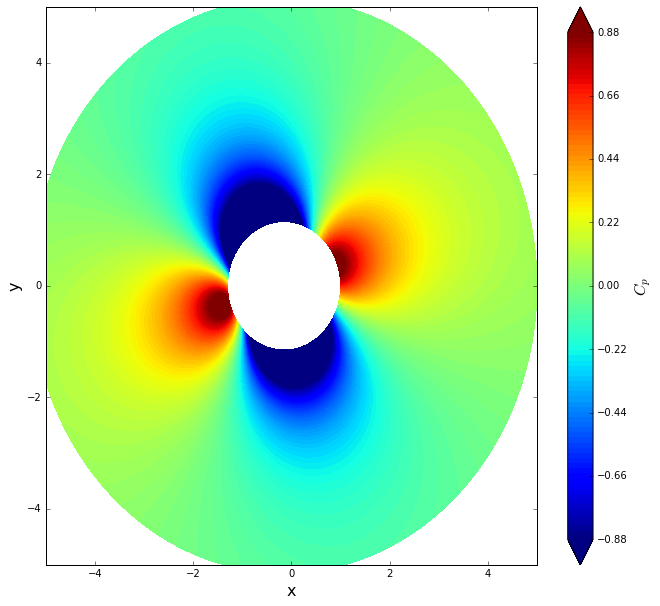

In [108]:
cp = 1.0 - (W_p.real**2+W_p.imag**2)/u_inf**2

size = 10
pyplot.figure(figsize=(1.1*size,size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(-5, 5)
pyplot.ylim(-5, 5)
contf = pyplot.contourf(z.real, z.imag, cp, levels=numpy.linspace(-0.88, 0.88, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-0.88, -0.66, -0.44,-0.22,0.00, 0.22,0.44,0.66,0.88])

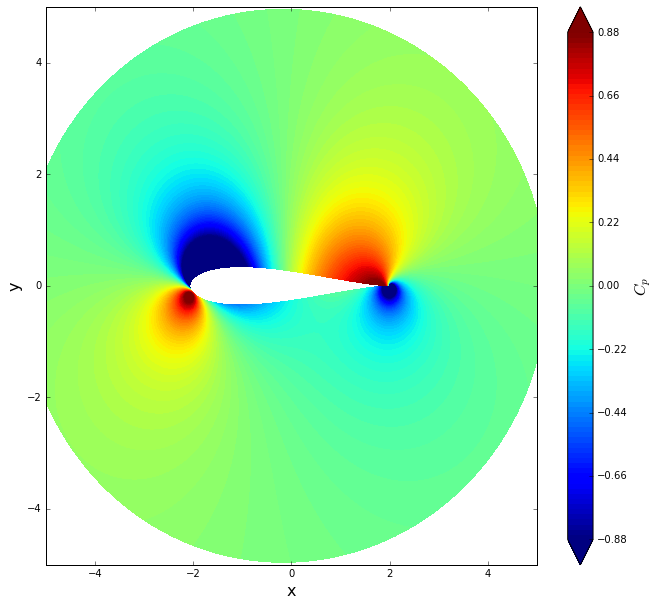

In [109]:
cp_z = 1.0 - (W_r.real**2+W_r.imag**2)/u_inf**2
size = 10
pyplot.figure(figsize=(1.1*size,size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(-5, 5)
pyplot.ylim(-5, 5)
contf = pyplot.contourf(zeta.real, zeta.imag, cp_z, levels=numpy.linspace(-0.88, 0.88, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-0.88, -0.66, -0.44,-0.22,0.00, 0.22,0.44,0.66,0.88])

In [110]:
cp_z[74][0]

-0.77647575893798226

In [111]:
W_r[49][0]

(1.6338283576980055-0.0046533384884599955j)

In [112]:
#PART 6
gamma = 4*numpy.pi*u_inf*(1)*numpy.sin(aoa)
x_vortex, y_vortex = -0.15, 0.0

In [113]:
def get_velocity_vortex(strength, xv, yv, X, Y):
    u = + strength/(2*math.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2)
    v = - strength/(2*math.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    
    return u, v

In [114]:
def get_stream_function_vortex(strength, xv, yv, X, Y):
    psi = strength/(4*math.pi)*numpy.log((X-xv)**2+(Y-yv)**2)
    
    return psi

In [115]:
u_vortex, v_vortex = get_velocity_vortex(gamma, x_vortex, y_vortex, zp.real, zp.imag)
psi_vortex = get_stream_function_vortex(gamma, x_vortex, y_vortex, zp.real, zp.imag)

In [116]:
u = u_freestream + u_doublet + u_vortex
v = v_freestream + v_doublet + v_vortex
psi = psi_freestream + psi_doublet + psi_vortex

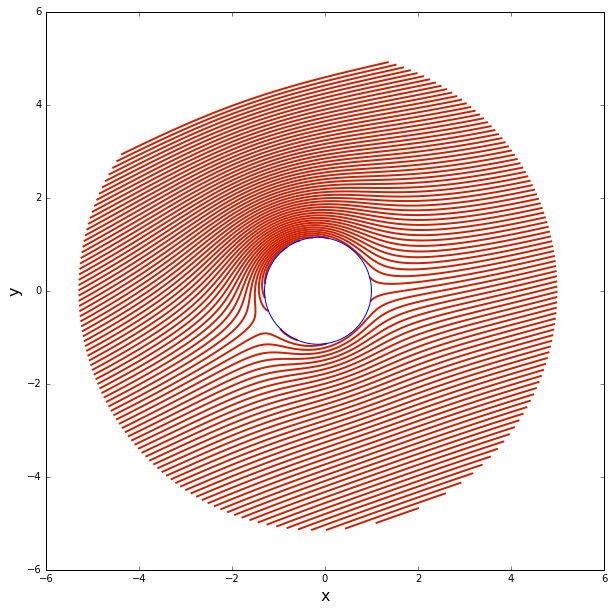

In [117]:
size = 10 
pyplot.figure(figsize=(size,size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(-6, 6)
pyplot.ylim(-6, 6)
pyplot.contour(z.real, z.imag, psi, levels=numpy.linspace(-5,5,100), colors='#CD2305', linewidths=2, linestyles='solid')
pyplot.plot((z[:,0]).real,(z[:,0]).imag)

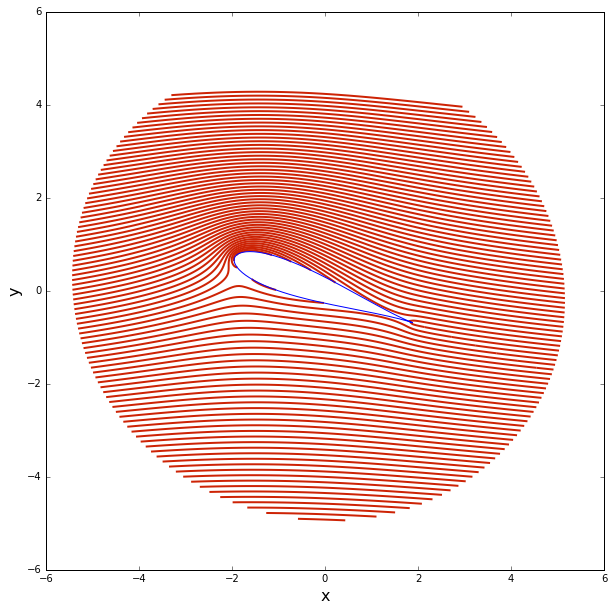

In [118]:
size = 10
pyplot.figure(figsize=(size, size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(-6, 6)
pyplot.ylim(-6, 6)
pyplot.contour((zeta*numpy.exp(-1j*aoa)).real, (zeta*numpy.exp(-1j*aoa)).imag, psi, levels=numpy.linspace(-5,5,100), colors='#CD2305', linewidths=2, linestyles='solid')
pyplot.plot((zeta[:,0]*numpy.exp(-1j*aoa)).real,(zeta[:,0]*numpy.exp(-1j*aoa)).imag)

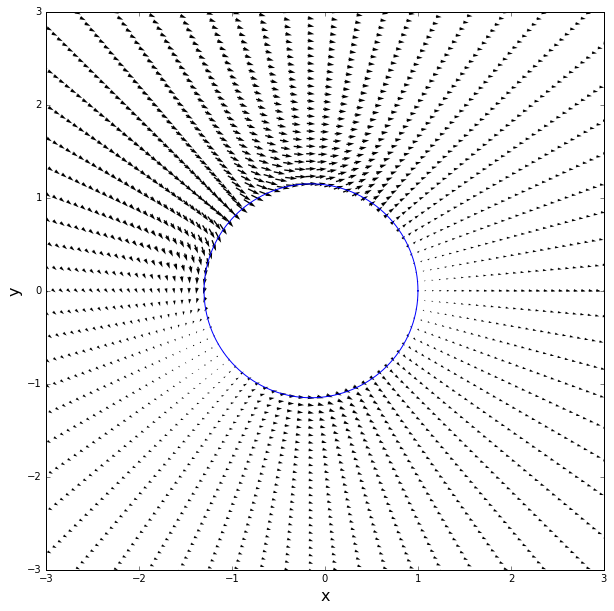

In [119]:
W_p = (u-1j*v)*numpy.exp(-aoa*1j)
size = 10
pyplot.figure(figsize=(size,size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(-3, 3)
pyplot.ylim(-3, 3)
pyplot.quiver(z.real[::2, ::2], z.imag[::2, ::2], W_p.real[::2, ::2], W_p.imag[::2, ::2],
               pivot='mid', units='xy')
pyplot.plot((z[:,0]).real,(z[:,0]).imag)


In [120]:
W_r = (W_p.real+1j*W_p.imag)/(1-(c/z)**2)

/home/gil/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


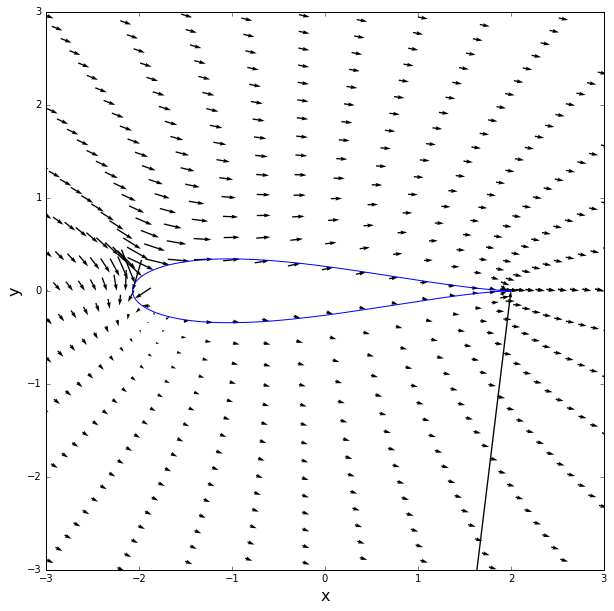

In [121]:
size = 10
pyplot.figure(figsize=(size,size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(-3, 3)
pyplot.ylim(-3, 3)
pyplot.quiver(zeta.real[::4, ::4], zeta.imag[::4, ::4], W_r.real[::4, ::4], W_r.imag[::4, ::4],
               pivot='tip', units='xy',scale=10)
pyplot.plot((zeta[:,0]).real,(zeta[:,0]).imag)

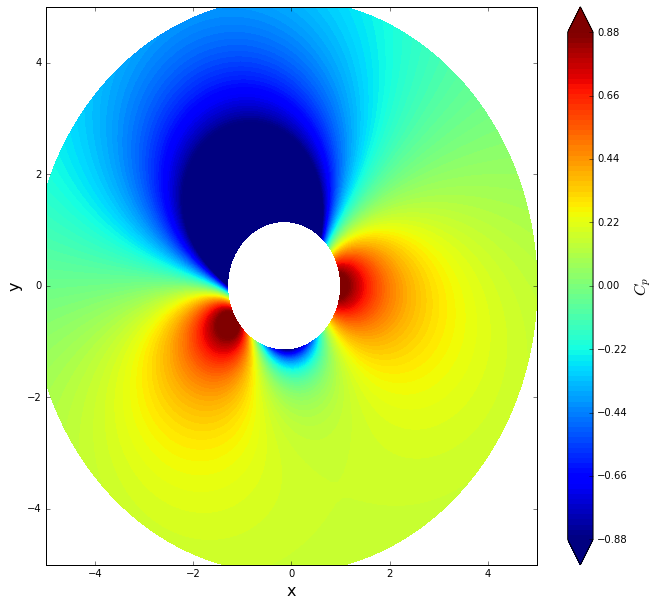

In [122]:
cp = 1.0 - (W_p.real**2+W_p.imag**2)/u_inf**2

size = 10
pyplot.figure(figsize=(1.1*size,size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(-5, 5)
pyplot.ylim(-5, 5)
contf = pyplot.contourf(z.real, z.imag, cp, levels=numpy.linspace(-0.88, 0.88, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-0.88, -0.66, -0.44,-0.22,0.00, 0.22,0.44,0.66,0.88])

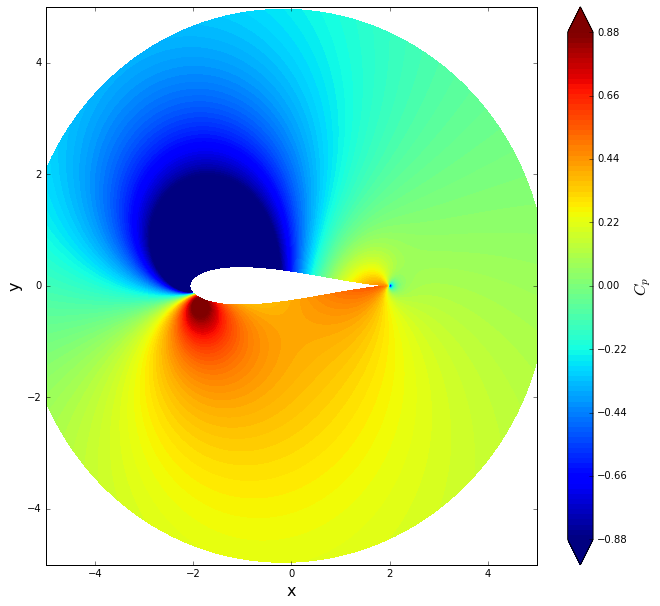

In [123]:
cp_z = 1.0 - (W_r.real**2+W_r.imag**2)/u_inf**2
size = 10
pyplot.figure(figsize=(1.1*size,size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(-5, 5)
pyplot.ylim(-5, 5)
contf = pyplot.contourf(zeta.real, zeta.imag, cp_z, levels=numpy.linspace(-0.88, 0.88, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-0.88, -0.66, -0.44,-0.22,0.00, 0.22,0.44,0.66,0.88])